In [149]:
import rasterio
from rasterio.plot import show
from rasterio.enums import Resampling
import pyproj
from matplotlib import pyplot
import numpy as np
import rioxarray

In [150]:
img = rioxarray.open_rasterio('data/example_strawberry_focus_area.tif')
img_wgs84 = img.rio.reproject("EPSG:4326")
img_wgs84.rio.to_raster('converted_example_strawberry_focus_area.tif')

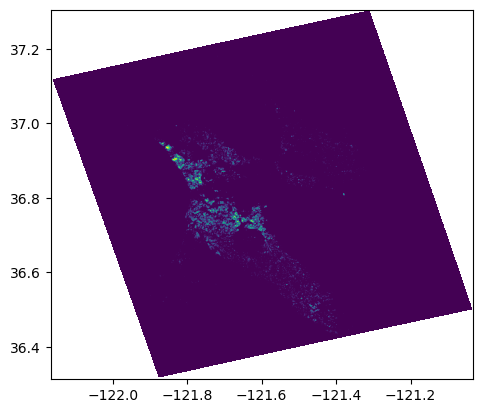

0
255
3864713
3817297
47416
3864713


In [156]:
wgs84_cropscape_example = rasterio.open('converted_example_strawberry_focus_area.tif')
show(wgs84_cropscape_example)


sample_data = wgs84_cropscape_example.read(1)
min_value=np.min(sample_data)
max_value=np.max(sample_data)
count=np.sum(sample_data>0)
count_255=np.sum(sample_data==255)
count_221=np.sum(sample_data==221)

print(min_value)
print(max_value)
print(count)
print(count_255)
print(count_221)
print(count_221+count_255)


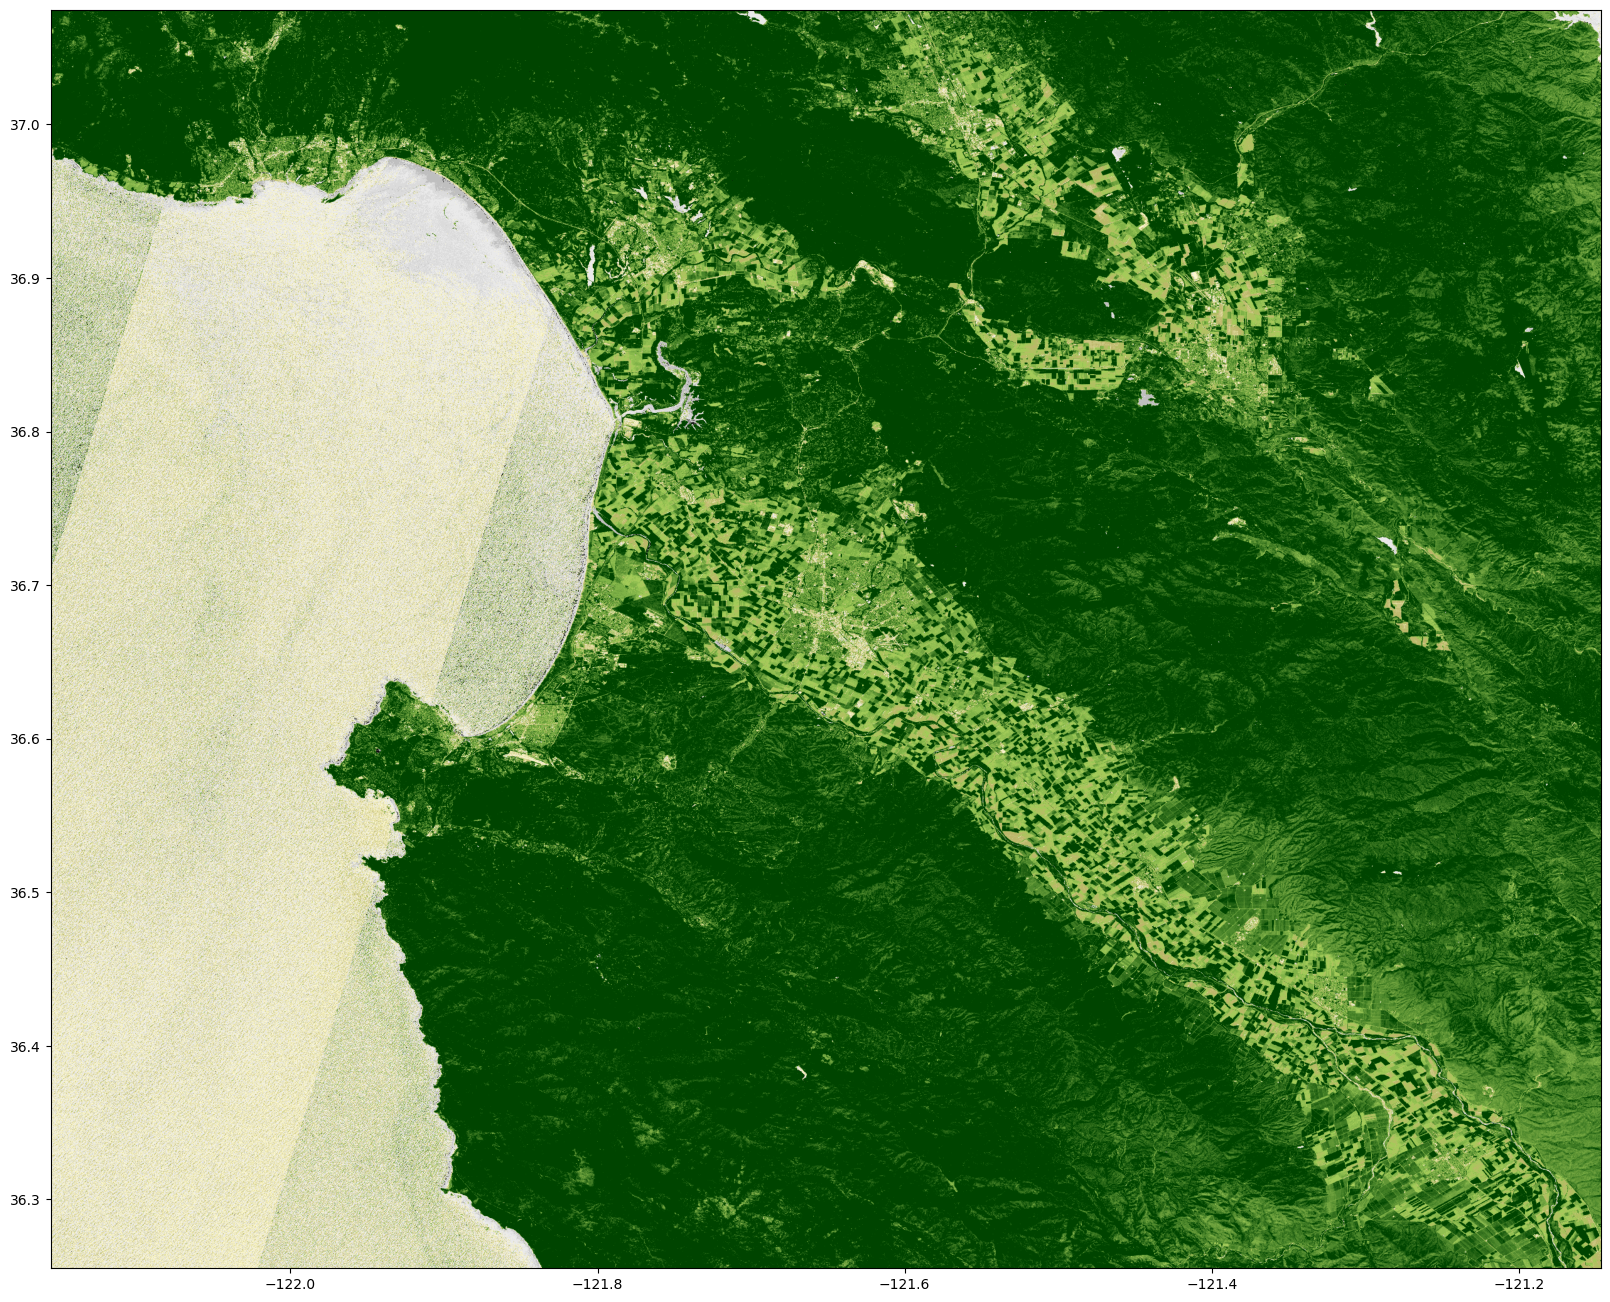

<Axes: >

In [153]:
pyplot.figure(figsize=(20,20))
copernicus_example = rasterio.open('example_copernicus_ndvi.tiff')
show(copernicus_example)

In [10]:



mask = wgs84_cropscape_example.read(1)
ndvi = copernicus_example.read(1)
masked_example = np.where(mask>1,copernicus_example,0)

In [15]:
type(masked_example)

numpy.ndarray

In [16]:
with rasterio.open('example_copernicus_ndvi.tiff') as target:
    target_array = target.read(1)
    target_profile = target.profile


Masked TIFF file saved at example_masked_output.tiff


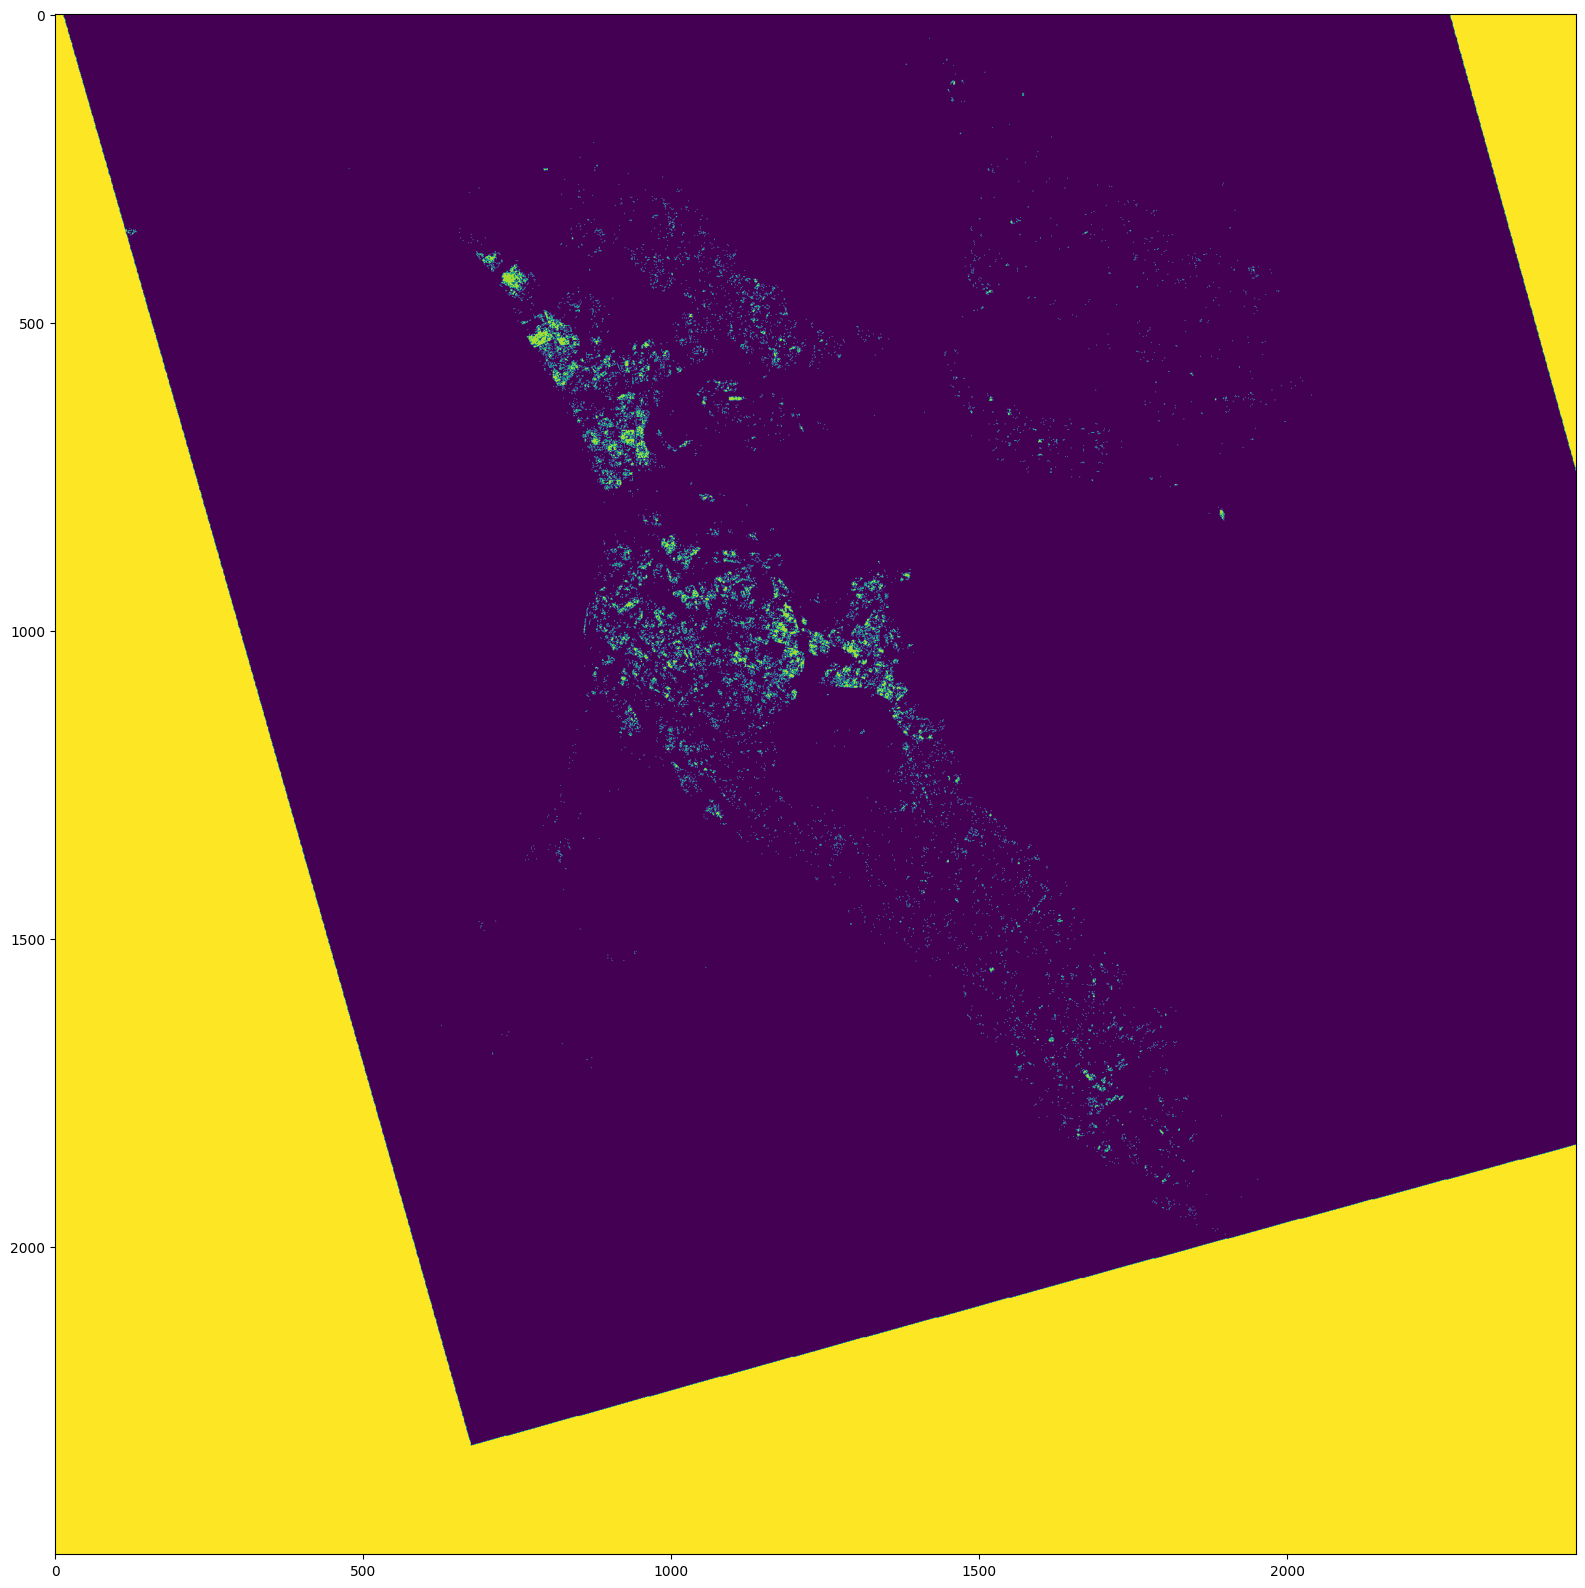

<Axes: >

In [164]:
def resample_raster(src_raster, target_raster_profile, resampling_method=Resampling.nearest):
    """
    Resample the source raster to match the target raster's profile.
    """
    with rasterio.open(src_raster) as src:
        data = np.empty((src.count, target_raster_profile['height'], target_raster_profile['width']), dtype=src.dtypes[0])
        transform = target_raster_profile['transform']
        
        for i in range(1, src.count + 1):
            rasterio.warp.reproject(
                source=rasterio.band(src, i),
                destination=data[i - 1],
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=target_raster_profile['crs'],
                resampling=resampling_method
            )
        return data[0], transform

#read the target that needs to be masked
with rasterio.open('example_copernicus_ndvi.tiff') as target:
    target_array = target.read() 
    target_profile = target.profile

#resample source to match the target
source_resampled, _ = resample_raster('converted_example_strawberry_focus_area.tif', target_profile)

#set masking
threshold = 221
mask_array = source_resampled == threshold

# Apply the mask
masked_array = np.where(mask_array, target_array, 0)  # Replace masked areas with 0

# Save the masked array to a new TIFF file
output_path = 'example_masked_output.tiff'
with rasterio.open(output_path, 'w', **target_profile) as dst:
    for i in range(target_array.shape[0]):
        dst.write(masked_array[i].astype('float32'), i+1)

print(f"Masked TIFF file saved at {output_path}")

pyplot.figure(figsize=(20,20))
show(source_resampled)

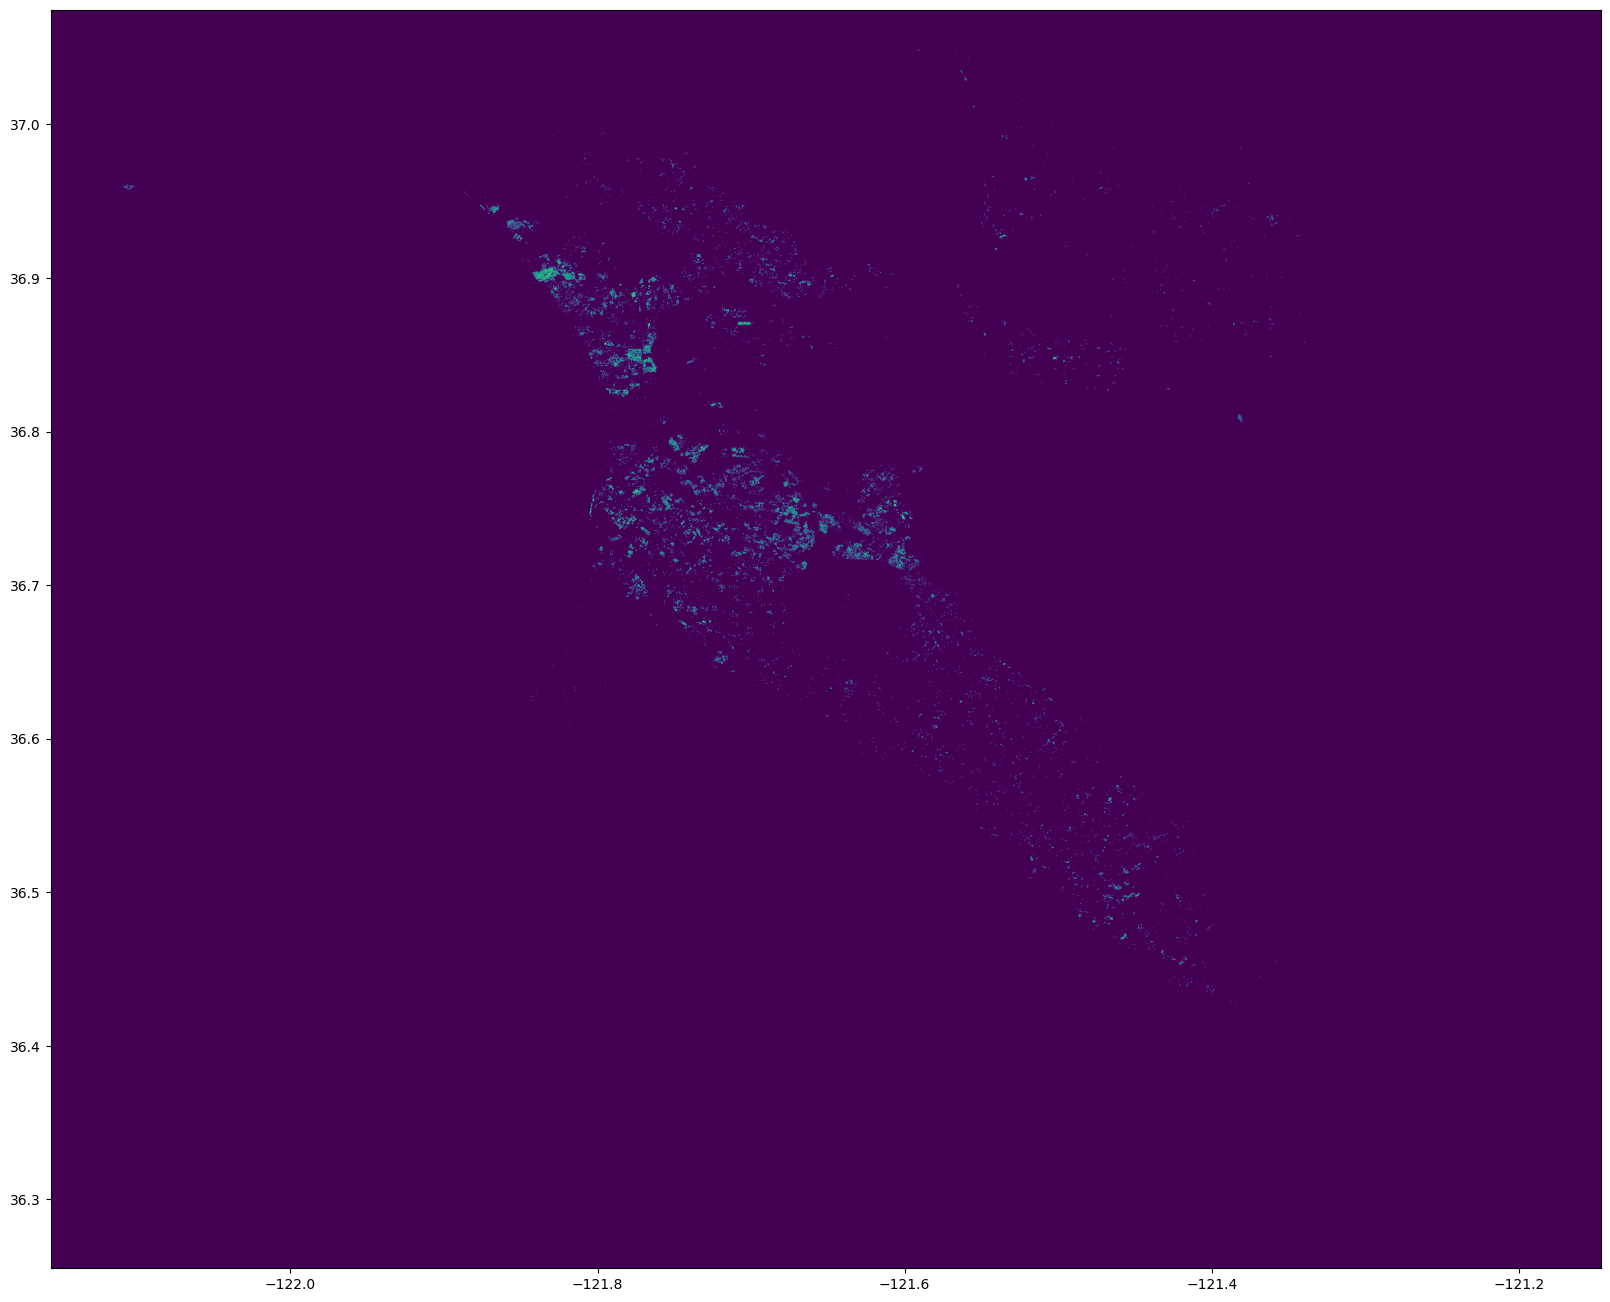

<Axes: >

In [165]:
pyplot.figure(figsize=(20,20))
masked_example = rasterio.open('example_masked_output.tiff')
show(masked_example)

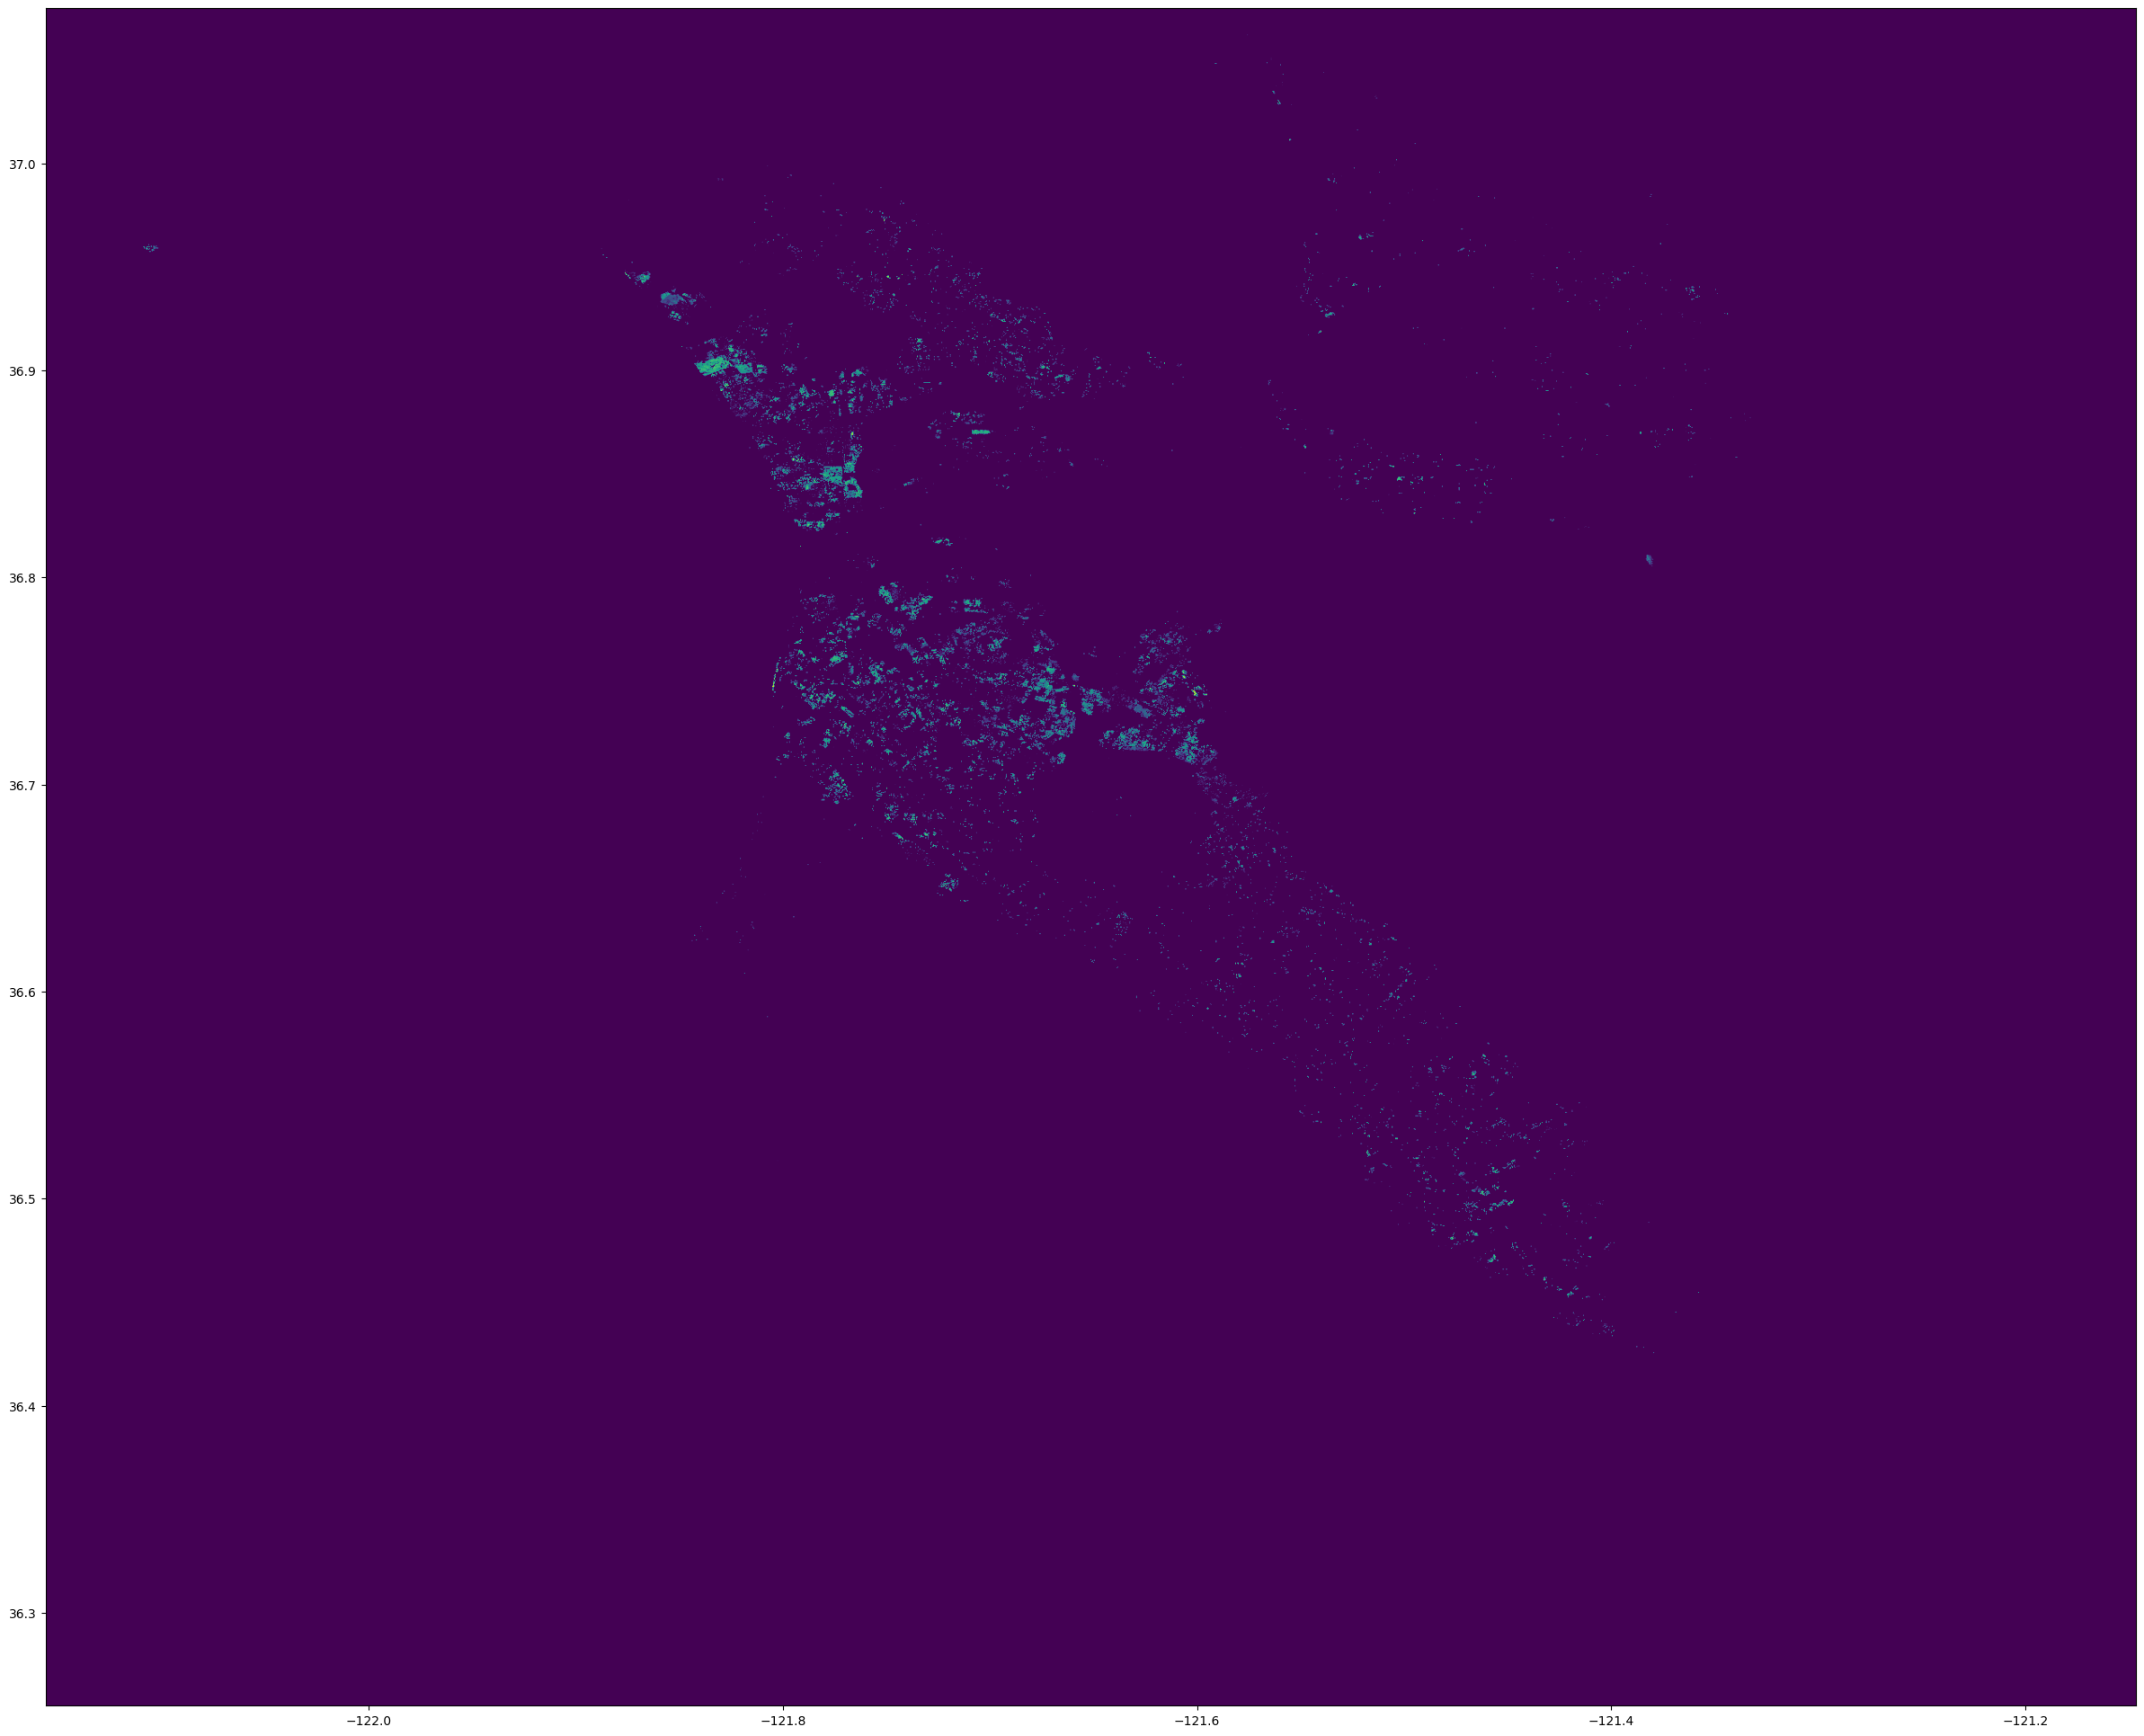

<Axes: >

In [147]:
pyplot.figure(figsize=(30,30))
masked_example = rasterio.open('example_masked_output.tiff')
show(masked_example)

In [159]:

# landsat_example = rasterio.open('data/LC08_L2SP_042033_20200912_20200919_02_T1/LC08_L2SP_042033_20200912_20200919_02_T1_SR_EVI.tif')

# project = pyproj.Transformer.from_crs(rdata_crs, 'EPSG:4326', always_xy=True).transform

landsat_example = rioxarray.open_rasterio('data/LC09_L2SP_043035_20211121_20230407_02_T1/LC09_L2SP_043035_20211121_20230407_02_T1_SR_EVI.tif')
landsat_example = landsat_example.rio.reproject("EPSG:4326")
landsat_example.rio.to_raster('converted_landsat_example.tif')



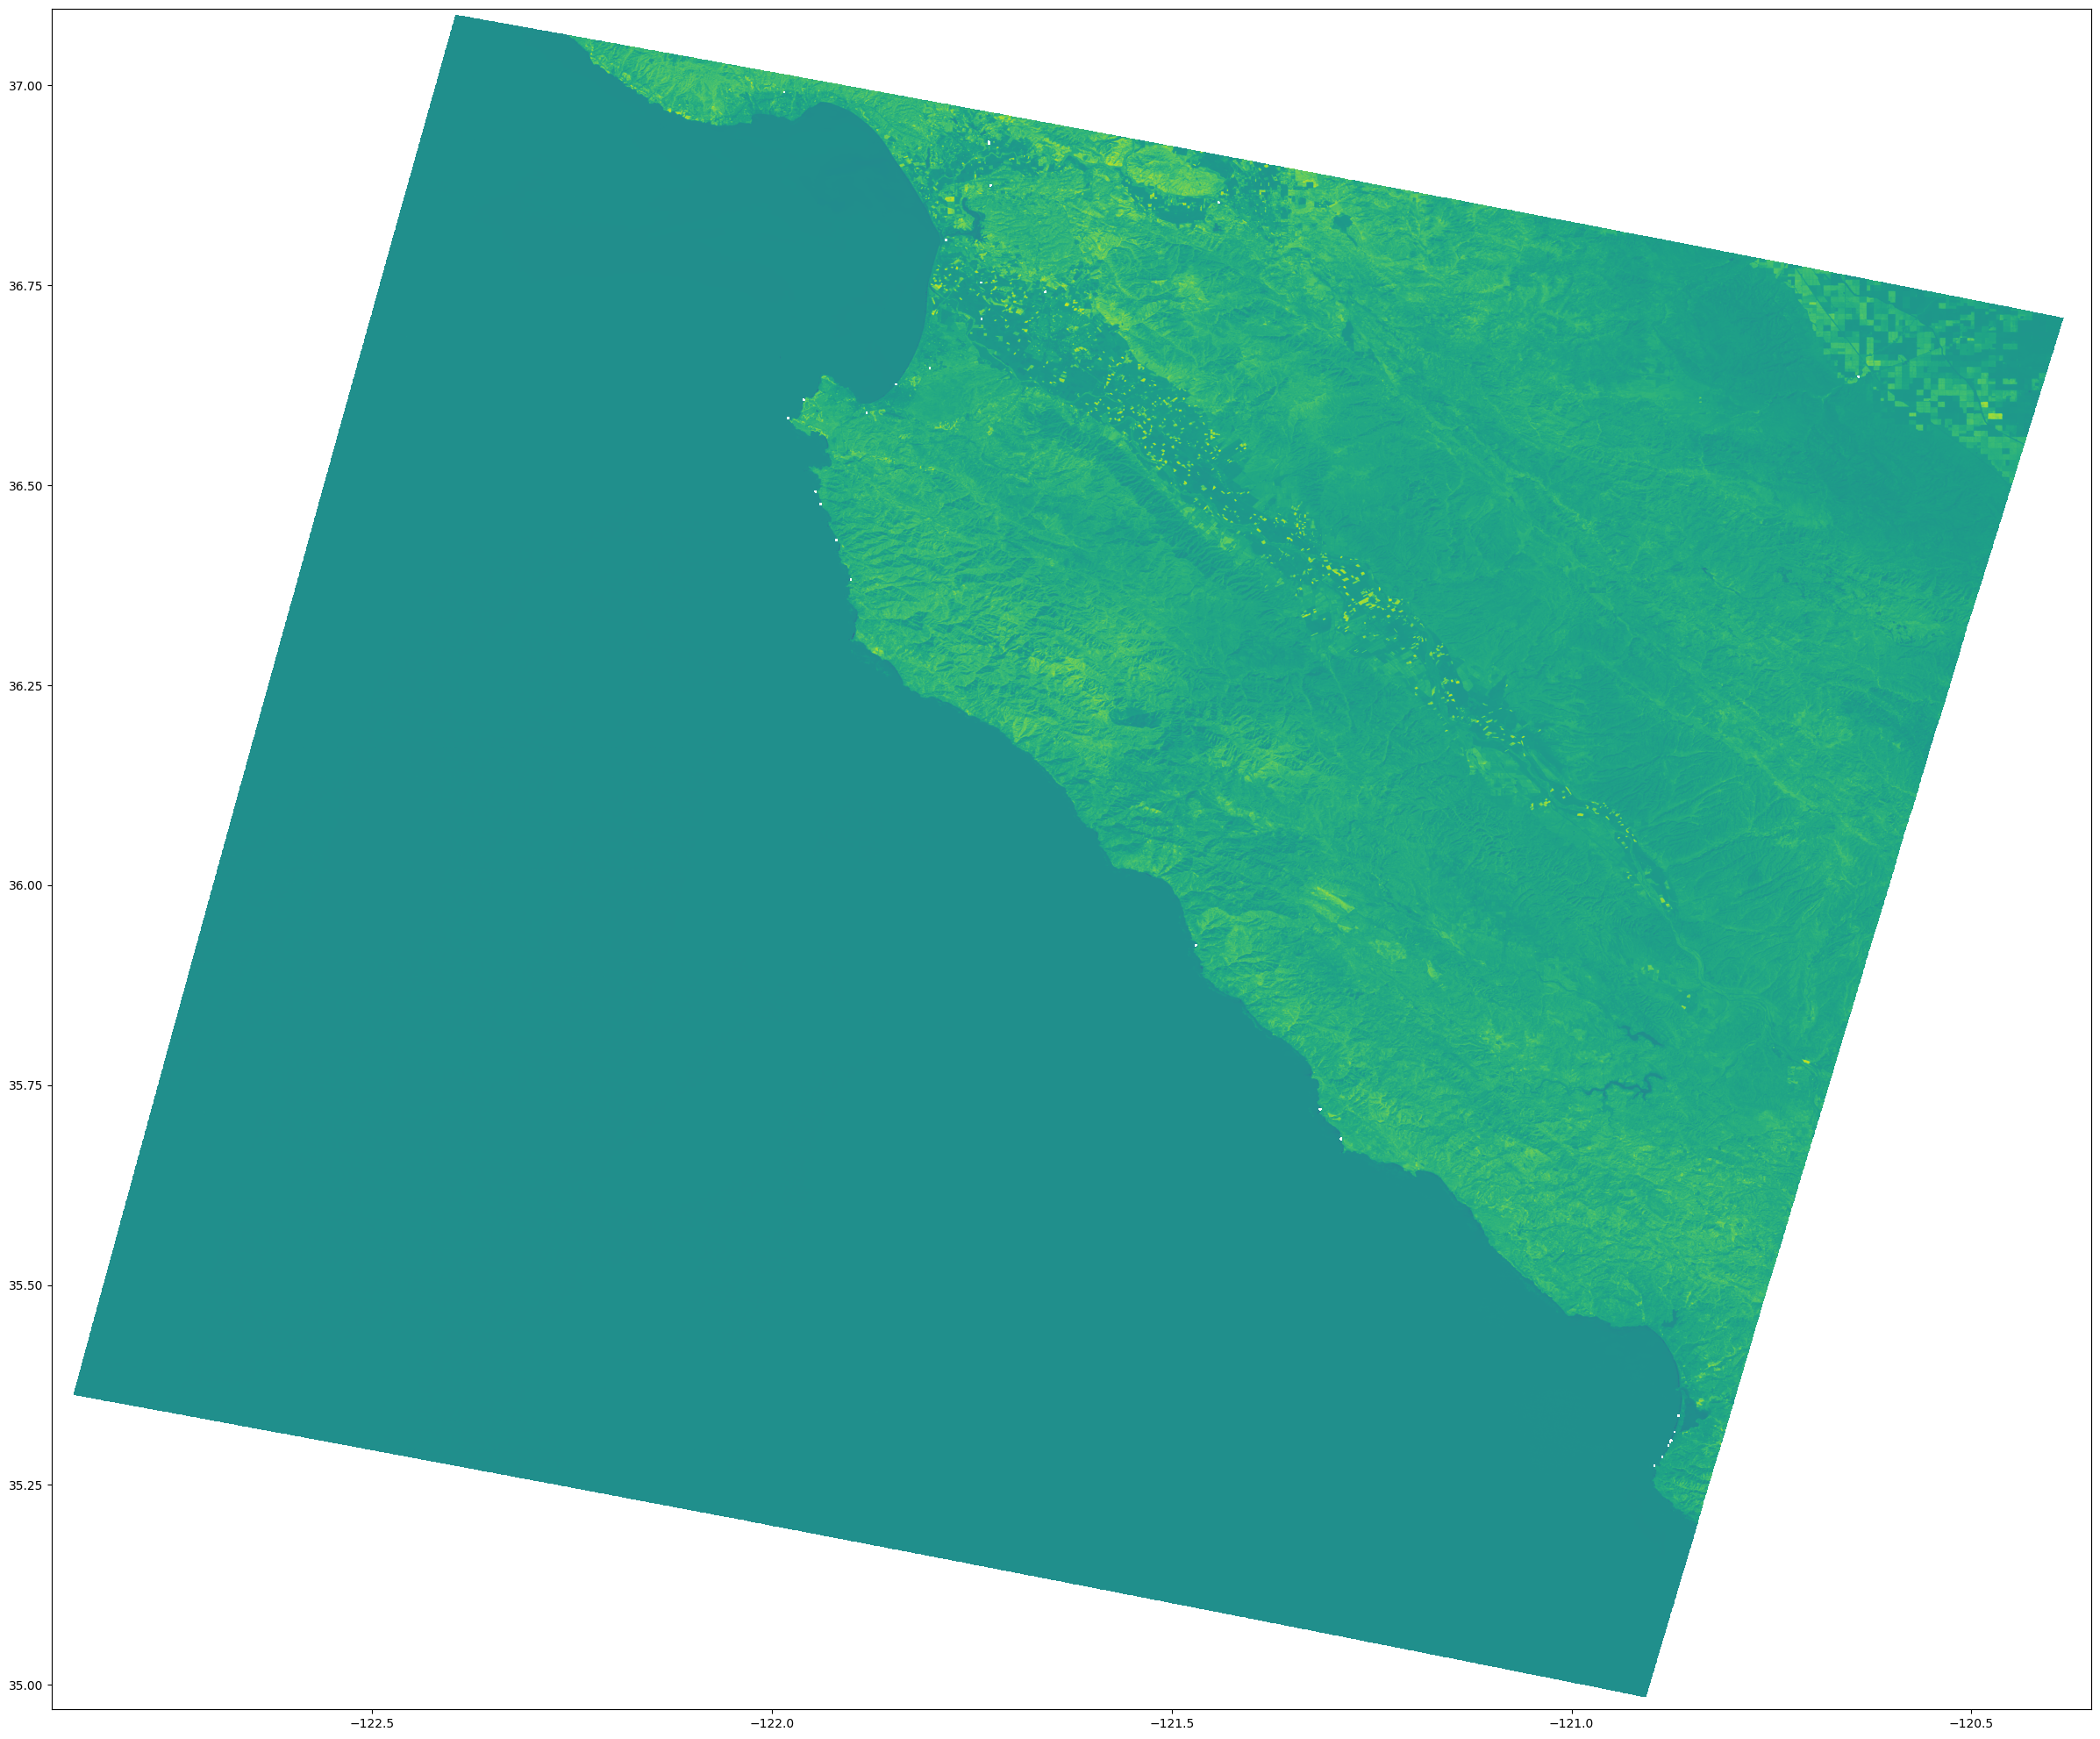

<Axes: >

In [160]:
pyplot.figure(figsize=(30,30))

converted_landsat_example=rasterio.open('converted_landsat_example.tif')

show(converted_landsat_example)

Masked TIFF file saved at example_masked_evi_output.tiff


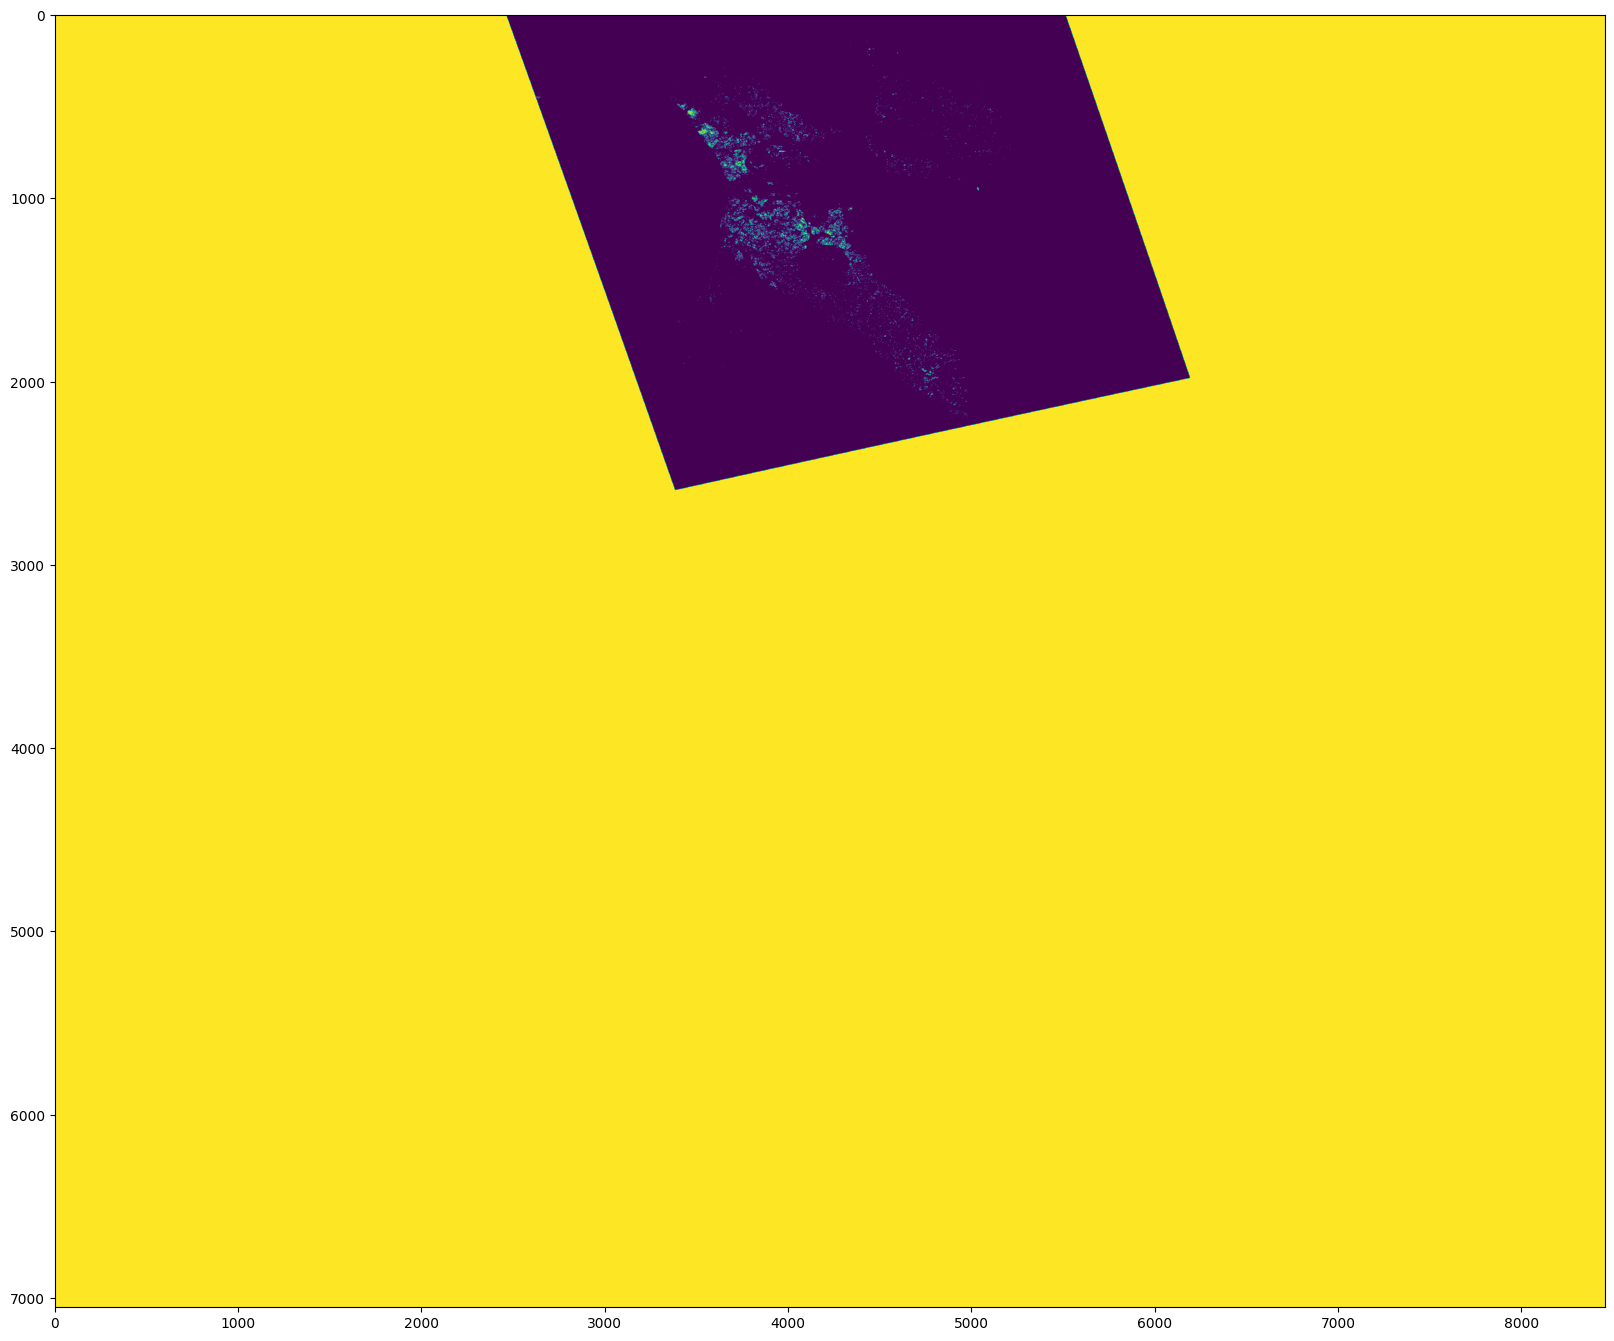

<Axes: >

In [168]:

#read the target that needs to be masked
with rasterio.open('converted_landsat_example.tif') as target:
    target_array = target.read() 
    target_profile = target.profile

#resample source to match the target
source_resampled, _ = resample_raster('converted_example_strawberry_focus_area.tif', target_profile)

#set masking
threshold = 221
mask_array = source_resampled == threshold

# Apply the mask
masked_array = np.where(mask_array, target_array, 0)  # Replace masked areas with NaN

# Save the masked array to a new TIFF file
output_path = 'example_masked_evi_output.tiff'
with rasterio.open(output_path, 'w', **target_profile) as dst:
    for i in range(target_array.shape[0]):
        dst.write(masked_array[i].astype('float32'), i+1)

print(f"Masked TIFF file saved at {output_path}")

pyplot.figure(figsize=(20,20))
show(source_resampled)

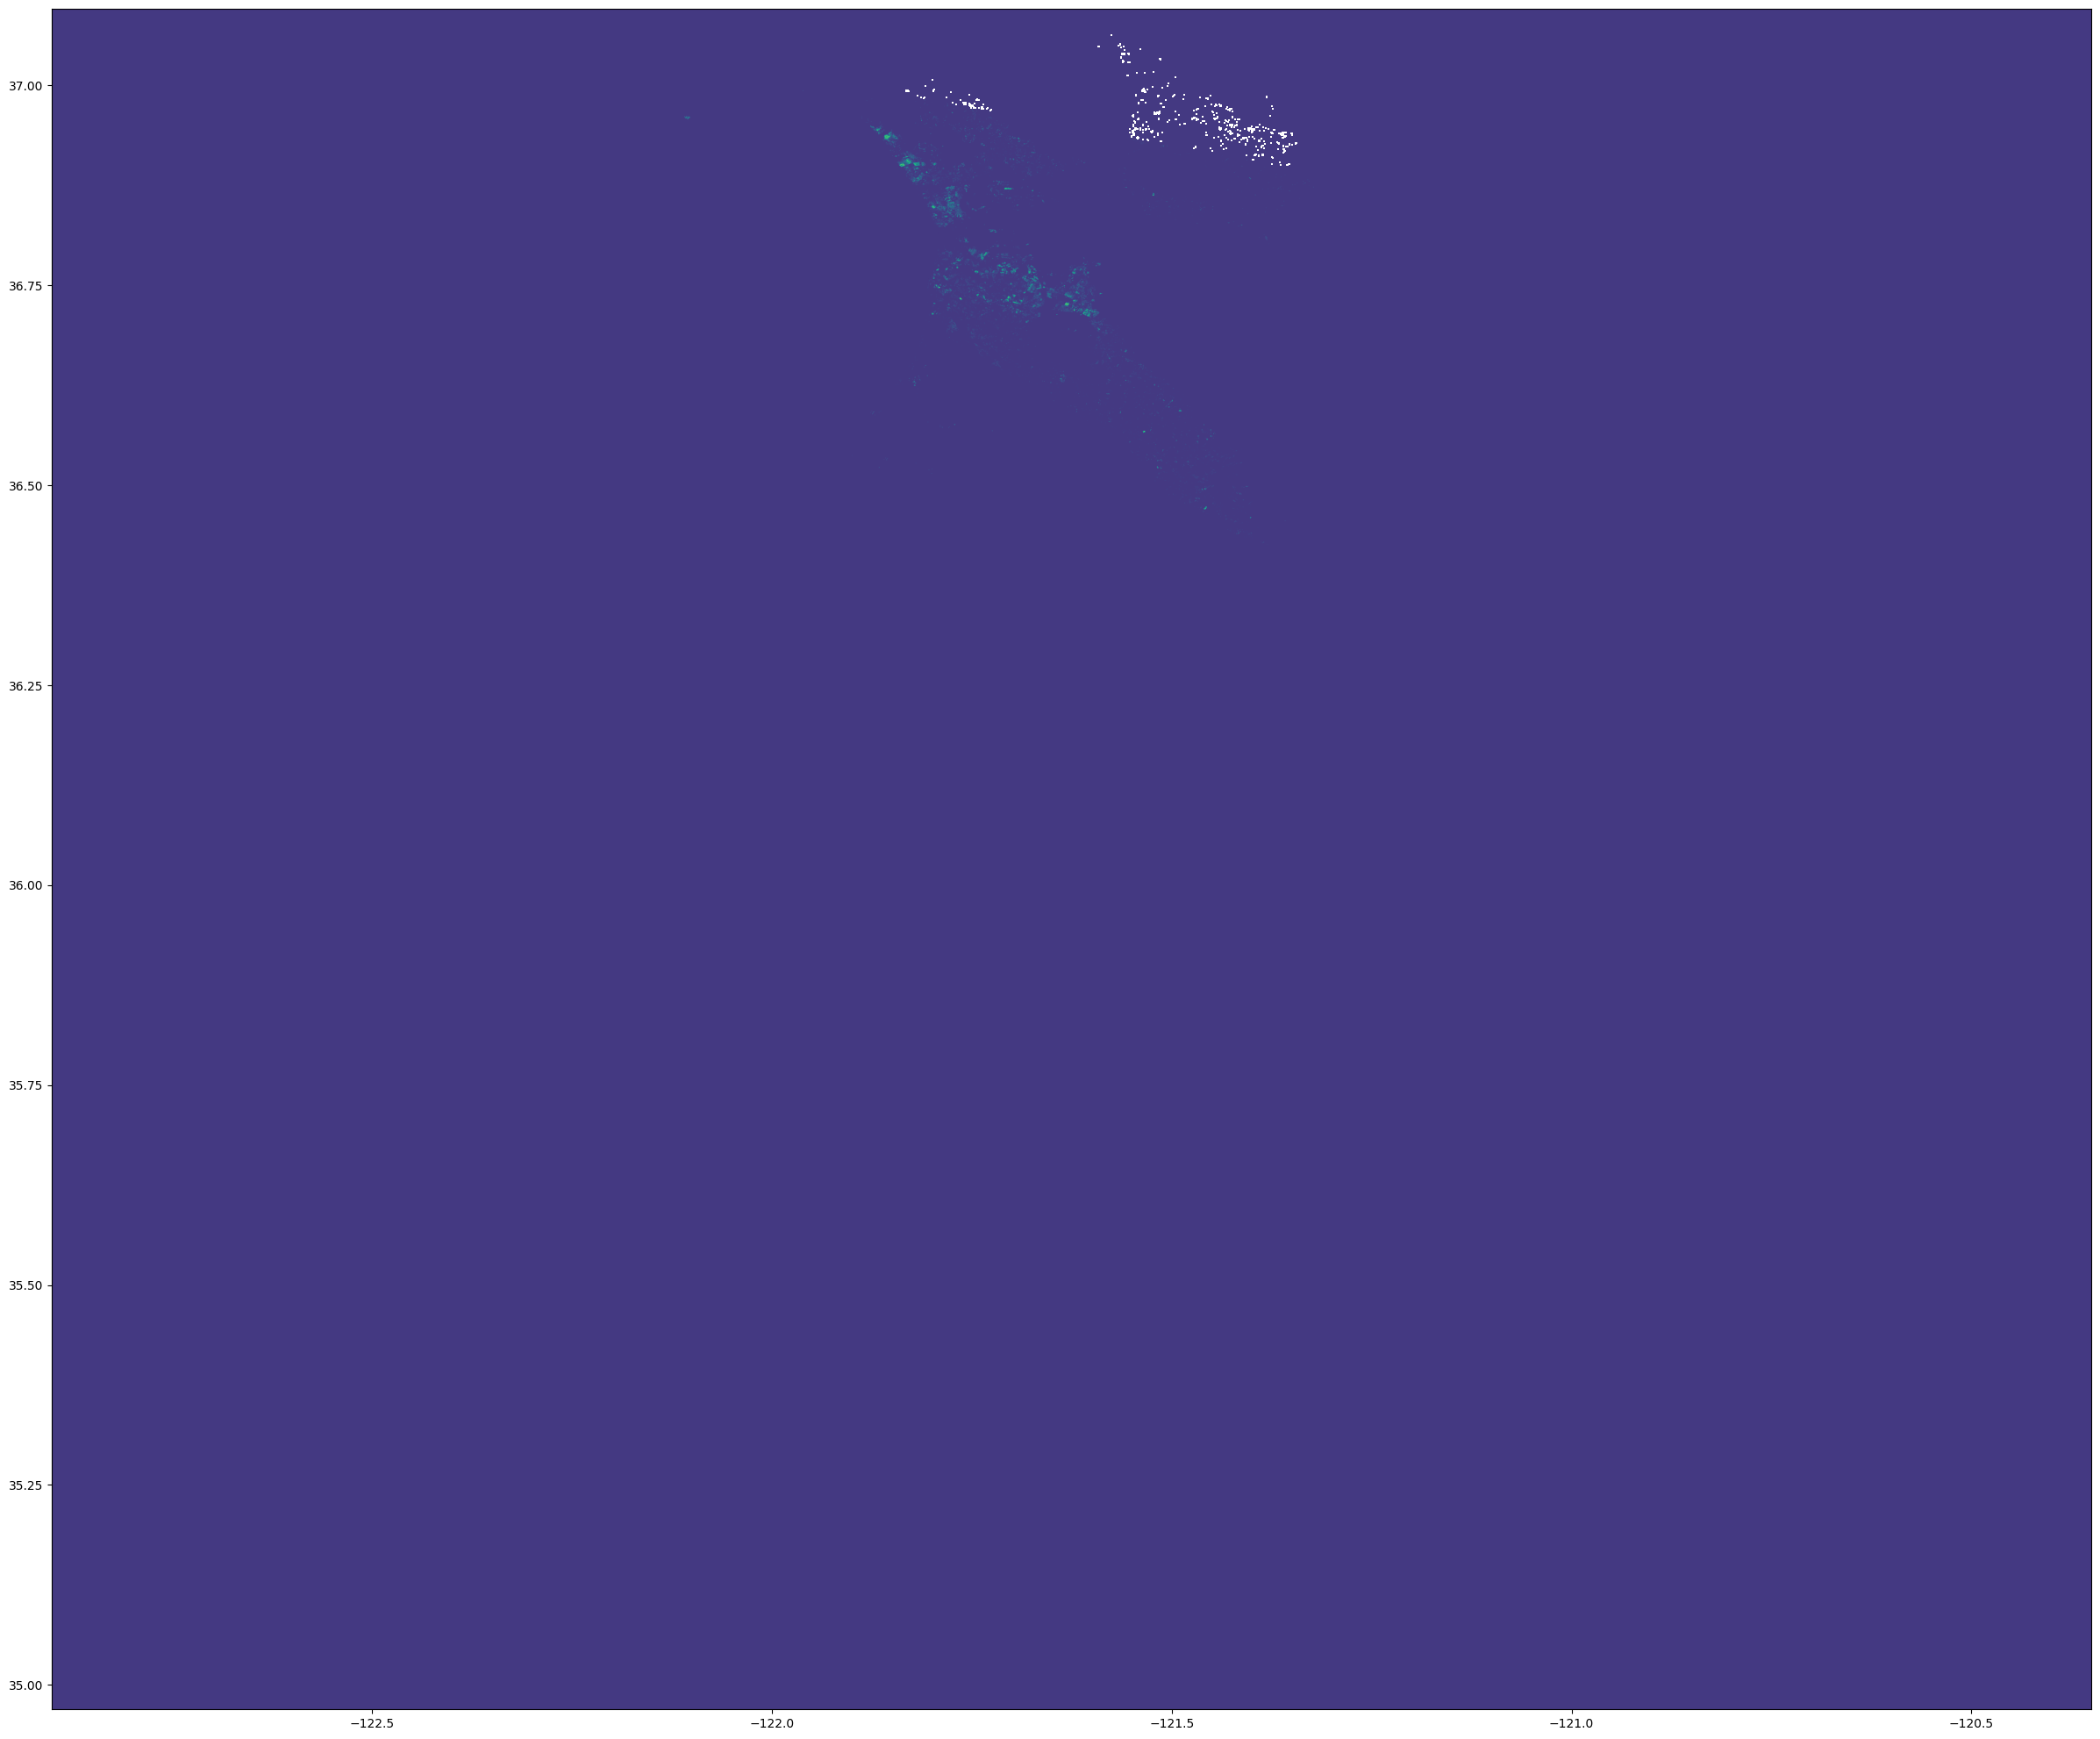

<Axes: >

In [169]:
pyplot.figure(figsize=(30,30))
masked_example = rasterio.open('example_masked_evi_output.tiff')
show(masked_example)

In [177]:
sample_data_array = masked_example.read()
print(sample_data_array.shape)

(1, 7051, 8457)


In [192]:
#sample masked data EDA
sample_data = masked_example.read(1)

min_value=np.min(sample_data)
max_value=np.max(sample_data)

print("Min:",min_value)
print("Max:",max_value)
print("Length:",len(sample_data.flatten()))

Min: -19999
Max: 9398
Length: 59630307


In [190]:
bounded_sample = sample_data[(sample_data >0) & (sample_data <= 10000)]
print(bounded_sample.shape)
print("Length Bounded Sample:",len(bounded_sample))

(51966,)
Length Bounded Sample: 51966


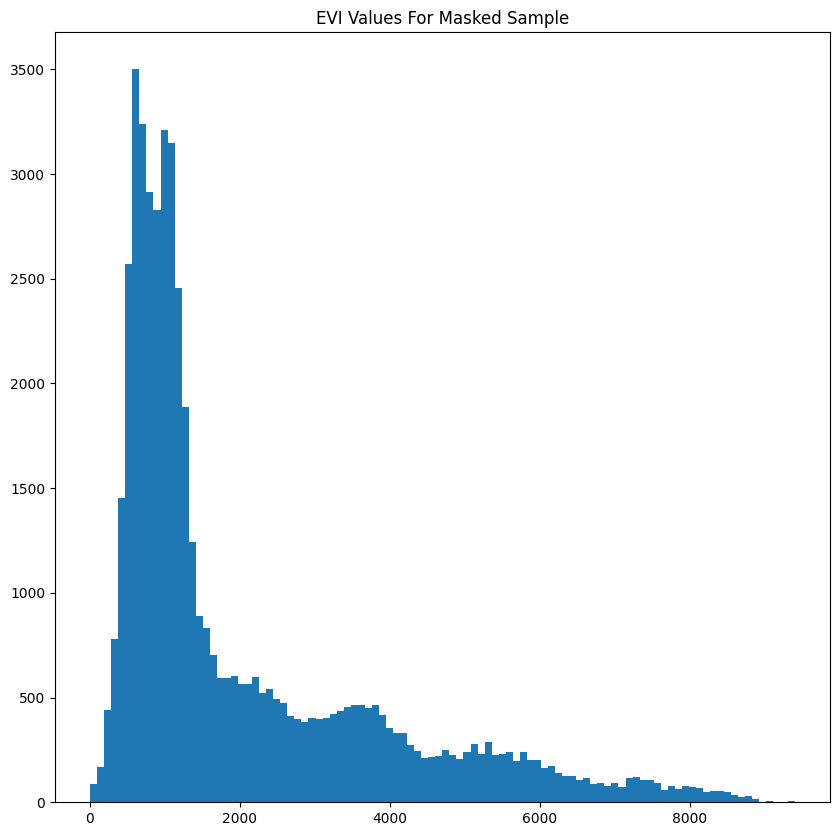

In [186]:
pyplot.figure(figsize=(10,10))
pyplot.hist(bounded_sample,bins=100)
pyplot.title('EVI Values For Masked Sample')

pyplot.show()